In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import torch

# Лабораторная работа №4

# 1. Загрузка данных датасета в переменную

In [2]:
data = pd.read_csv('JobSurveyIndia.csv')
data.head()

,Unnamed: 0,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,1,Private Sector,Art,No,Yes,4.0,600K-900K
2,2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,4,Private Sector,Technical,No,Yes,5.0,1200K-1500K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             400 non-null    int64  
 1   Employment Sector      400 non-null    object 
 2   Employment Background  400 non-null    object 
 3   Public Dealing         400 non-null    object 
 4   Degree                 400 non-null    object 
 5   IdealNumberOfWorkdays  400 non-null    float64
 6   IdealYearlyIncome      400 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.0+ KB


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

# 2. Задача классификации

# 3. Предобработка данных

Ниже будут объеденены пункты B и D в функции для выполнения кодирования категориальных переменных, а так же заполнения пустых значений.

### B. Проверка и заполнение пропусков. D. Кодирование категориальных переменных

- ##### Перевод из категориальных переменных в численные для удобства в дальнейшем
Создаются функции для замены категориальных значений в наборе данных, таких как Keys и Mode, на числовые значения. Keys преобразуются в соответствующие им частоты фортепианных клавиш, а Mode преобразуется с помощью метода One-Hot-Encoding (т. е. мажор = 1, минор = 0).

- ##### Обработка пустых значений
Нечисловые значения в наборе данных заменяются на NaN, а затем NaN и отсутствующие значения заменяются на медиану

- ##### Перевод в Int
Все столбцы атрибутов преобразованы к целочисленному типу данных для обеспечения единообразия

In [5]:
data.isnull().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

В нашем случае пропусков не обнаружено

In [6]:
# Создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()

# Кодируем переменные типа object
for column in data.select_dtypes(include='object'):
    data[column] = label_encoder.fit_transform(data[column])

print(data)

     Employment Sector  Employment Background  Public Dealing  Degree  \
0                    2                      3               0       1   
1                    2                      1               1       2   
2                    1                      3               0       1   
3                    1                      2               2       2   
4                    2                      3               0       1   
..                 ...                    ...             ...     ...   
395                  2                      2               1       2   
396                  1                      2               2       0   
397                  1                      2               2       0   
398                  1                      2               0       0   
399                  0                      2               2       0   

     IdealNumberOfWorkdays  IdealYearlyIncome  
0                      4.0                  3  
1                      4.0 

In [7]:
data['IdealNumberOfWorkdays'] = data['IdealNumberOfWorkdays'].astype('int32')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Employment Sector      400 non-null    int32
 1   Employment Background  400 non-null    int32
 2   Public Dealing         400 non-null    int32
 3   Degree                 400 non-null    int32
 4   IdealNumberOfWorkdays  400 non-null    int32
 5   IdealYearlyIncome      400 non-null    int32
dtypes: int32(6)
memory usage: 9.5 KB


In [9]:
data.head()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,2,3,0,1,4,3
1,2,1,1,2,4,1
2,1,3,0,1,6,2
3,1,2,2,2,4,2
4,2,3,0,1,5,0


### C. Нормирование численных переменных датасета

In [10]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = [ 'IdealNumberOfWorkdays']

trans = MinMaxScaler()

data[numeric_columns] = trans.fit_transform(data[numeric_columns])

data[numeric_columns] = pd.DataFrame(data[numeric_columns])

data[numeric_columns].head()


,IdealNumberOfWorkdays
0,0.000000
1,0.000000
2,0.666667
3,0.000000
4,0.333333


### A. Разделение выборки на тестовую и тренировочную

In [11]:
data.describe()

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,1.147500,2.010000,1.100000,0.85250,0.300833,1.505000
std,0.712047,0.906617,0.931219,0.79203,0.268663,1.057246
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.00000,0.333333,2.000000
75%,2.000000,3.000000,2.000000,1.25000,0.333333,2.000000
max,2.000000,3.000000,2.000000,2.00000,1.000000,3.000000


In [12]:
X = data.drop(columns=['IdealYearlyIncome'])
y = data['IdealYearlyIncome']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=17)

# 4. Dataset и Dataloader

In [14]:
from torch.utils.data import Dataset, DataLoader

In [15]:
class MyDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [16]:
# Создание объектов Dataset
train_dataset = MyDataset(X_train, y_train)
test_dataset = MyDataset(X_test, y_test)

# Создание объектов DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 5. Обучение модели на тренировочном множестве

In [17]:
import torch.nn as nn
import torch.optim as optim

In [18]:
# Функция потерь
criterion = nn.MSELoss()

# Количество эпох
epochs = 40

### А.Простая модель с оптимизатором

In [19]:
# Определение модели
model1 = nn.Linear(X_train.shape[1], 1)

# Определение оптимизатора
optimizer1 = optim.SGD(model1.parameters(), lr=0.001)

### B. Модель с 1 внешним слоем

In [20]:
# Определение модели
model2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Определение оптимизатора
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

### C. Модель с 3+ слоями

In [21]:
# Определение модели
model3 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Определение оптимизатора
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

# 6. Подсчет loss на train и test выборках и графики

In [22]:
# Инициализация списков для сохранения потерь
train_losses1, test_losses1 = [], []
train_losses2, test_losses2 = [], []
train_losses3, test_losses3 = [], []


In [23]:
# Функция для расчета потерь
def calculate_loss(model, loader):
    total_loss = 0
    for inputs, targets in loader:
        outputs = model(inputs.float())
        loss = criterion(outputs, targets.float())
        total_loss += loss.item()
    return total_loss / len(loader)

In [24]:
# Расчет потерь для каждой эпохи
for epoch in range(epochs):
    for model, optimizer, train_losses, test_losses in [(model1, optimizer1, train_losses1, test_losses1), 
                                                        (model2, optimizer2, train_losses2, test_losses2), 
                                                        (model3, optimizer3, train_losses3, test_losses3)]:
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.float())
            loss = criterion(outputs, targets.float())
            loss.backward()
            optimizer.step()

        train_loss = calculate_loss(model, train_loader)
        test_loss = calculate_loss(model, test_loader)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\Арслан\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


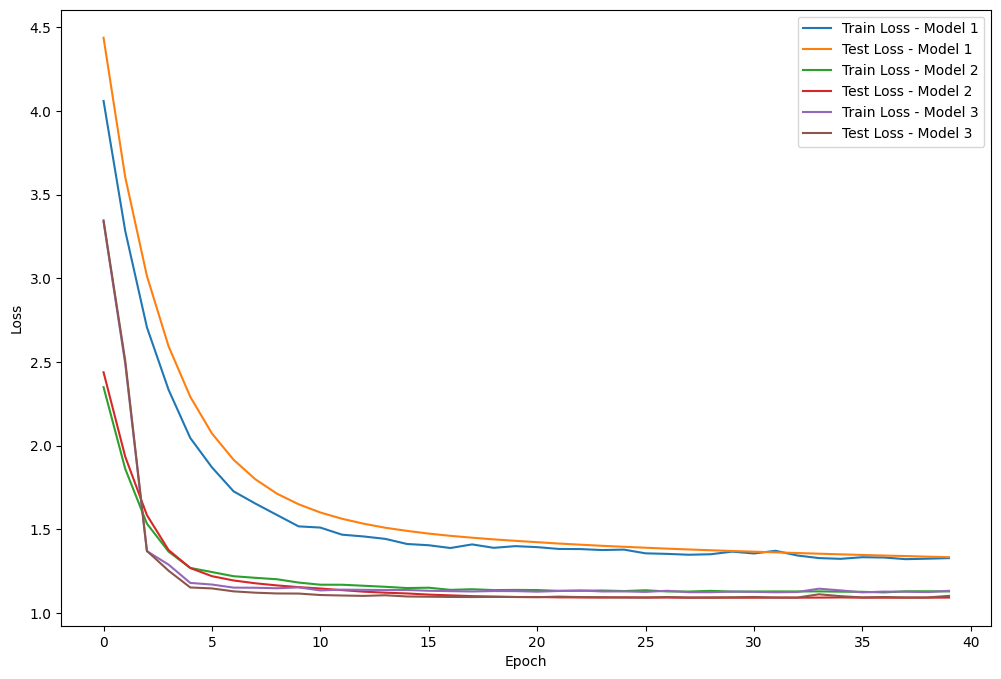

In [25]:
# Визуализация потерь
plt.figure(figsize=(12, 8))
plt.plot(train_losses1, label='Train Loss - Model 1')
plt.plot(test_losses1, label='Test Loss - Model 1')
plt.plot(train_losses2, label='Train Loss - Model 2')
plt.plot(test_losses2, label='Test Loss - Model 2')
plt.plot(train_losses3, label='Train Loss - Model 3')
plt.plot(test_losses3, label='Test Loss - Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Подсчет метрик на train и test множествах для регресии(Accuracy)

In [28]:
# Функция для расчета Accuracy
def calculate_accuracy(model, loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in loader:
            outputs = model(inputs.float())
            predicted = (outputs > 0.5).float()  # Порог для бинарной классификации
            correct += (predicted == targets.view_as(predicted)).sum().item()
            total += targets.size(0)
    return correct / total

# Расчет Accuracy для каждой модели на train и test множествах
for model, name in [(model1, 'Model 1'), (model2, 'Model 2'), (model3, 'Model 3')]:
    train_accuracy = calculate_accuracy(model, train_loader)
    test_accuracy = calculate_accuracy(model, test_loader)
    print(f'{name} - Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')


Model 1 - Train Accuracy: 0.1781, Test Accuracy: 0.2375
Model 2 - Train Accuracy: 0.1531, Test Accuracy: 0.2000
Model 3 - Train Accuracy: 0.1531, Test Accuracy: 0.2000


# 8. Сравненеи метрик и выводы

In [30]:
# Функция для отображения метрик
def display_metrics(train_metrics, test_metrics, model_names, metric_name):
    print(f'{metric_name} Сравнение:')
    for train_metric, test_metric, model_name in zip(train_metrics, test_metrics, model_names):
        print(f'{model_name} - Train {metric_name}: {train_metric:.4f}, Test {metric_name}: {test_metric:.4f}')

# Расчет метрик Accuracy для каждой модели на train и test множествах
train_accuracies = []
test_accuracies = []

for model in [model1, model2, model3]:
    train_accuracy = calculate_accuracy(model, train_loader)
    test_accuracy = calculate_accuracy(model, test_loader)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Отображение метрик Accuracy
display_metrics(train_accuracies, test_accuracies, ['Model 1', 'Model 2', 'Model 3'], 'Accuracy')

# Ответы на вопросы
print("\nОтветы на вопросы:")
best_model_index = test_accuracies.index(max(test_accuracies))
print(f"1. Лучшая модель: {['Model 1', 'Model 2', 'Model 3'][best_model_index]}")
print("2. Переобучение определяется разницей между метриками на train и test.")
for i, model_name in enumerate(['Model 1', 'Model 2', 'Model 3']):
    if train_accuracies[i] > test_accuracies[i]:
        print(f"{model_name} - Есть признаки переобучения.")
    else:
        print(f"{model_name} - Переобучения нет.")
print("3. Недообучение можно определить, если метрика на train и test низкая.")
for i, model_name in enumerate(['Model 1', 'Model 2', 'Model 3']):
    if train_accuracies[i] < 0.7 or test_accuracies[i] < 0.7:
        print(f"{model_name} - Есть признаки недообучения.")
    else:
        print(f"{model_name} - Недообучения нет.")
print("4. Для улучшения метрик моделей можно использовать следующие методы:")
print("- Использование более сложных моделей или увеличение количества слоев и нейронов в сети.")
print("- Использование других оптимизаторов или изменение параметров текущих оптимизаторов.")
print("- Регуляризация моделей для снижения переобучения.")
print("- Использование методов аугментации данных для увеличения разнообразия тренировочного набора данных.")


Accuracy Сравнение:
Model 1 - Train Accuracy: 0.1781, Test Accuracy: 0.2375
Model 2 - Train Accuracy: 0.1531, Test Accuracy: 0.2000
Model 3 - Train Accuracy: 0.1531, Test Accuracy: 0.2000

Ответы на вопросы:
1. Лучшая модель: Model 1
2. Переобучение определяется разницей между метриками на train и test.
Model 1 - Переобучения нет.
Model 2 - Переобучения нет.
Model 3 - Переобучения нет.
3. Недообучение можно определить, если метрика на train и test низкая.
Model 1 - Есть признаки недообучения.
Model 2 - Есть признаки недообучения.
Model 3 - Есть признаки недообучения.
4. Для улучшения метрик моделей можно использовать следующие методы:
- Использование более сложных моделей или увеличение количества слоев и нейронов в сети.
- Использование других оптимизаторов или изменение параметров текущих оптимизаторов.
- Регуляризация моделей для снижения переобучения.
- Использование методов аугментации данных для увеличения разнообразия тренировочного набора данных.
